# Exercise

Regression problem:
- Predicting the insurance charges based on some features
- Using Neural Network Regression Model

In [1]:
# import necessary library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the insurance file
data = pd.read_csv("../../data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Encode the categorical data**

In [6]:
# Pandas one-hot encoding

insurance_one_hot = pd.get_dummies(data)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


**Train & Test Split**

In [7]:
# Create X and y 

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [8]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [11]:
X_train.shape

(1070, 11)

In [12]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [13]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [14]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


**Build the Neural Network Model**

In [15]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, input_shape=[11]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# fit model
model.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13256.9531 - mae: 13256.9531
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12910.2256 - mae: 12910.2256
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12185.1621 - mae: 12185.1621
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11012.1611 - mae: 11012.1611
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9615.8594 - mae: 9615.8594
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8378.4072 - mae: 8378.4072
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7671.4609 - mae: 7671.4609
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7477.2964 - mae: 7477.2964
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7432.5625 - mae: 7432.5625
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7411.3213 - mae: 7

34/34 [==============================] - 0s 2ms/step - loss: 5734.1470 - mae: 5734.1470
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 5709.6011 - mae: 5709.6011
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5680.4668 - mae: 5680.4668
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 5660.2642 - mae: 5660.2642
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5631.1743 - mae: 5631.1743
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5603.7554 - mae: 5603.7554
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5574.8896 - mae: 5574.8896
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5544.7144 - mae: 5544.7144
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 5513.9375 - mae: 5513.9375
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5487.8188 - mae: 5487.8188
Epo

In [18]:
X_test = tf.convert_to_tensor(X_test.to_numpy(), dtype=tf.float64)

In [19]:
# Check the result of the model

model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5068.9590 - mae: 5068.9590


[5068.958984375, 5068.958984375]

In [20]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improve the model

In [21]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
model_2.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12495.9062 - mae: 12495.9062
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7973.3970 - mae: 7973.3970
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7400.9365 - mae: 7400.9365
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7232.8882 - mae: 7232.8882
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7095.1553 - mae: 7095.1553
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6918.0342 - mae: 6918.0342
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6712.9258 - mae: 6712.9258
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6491.7627 - mae: 6491.7627
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6392.9102 - mae: 6392.9102
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6295.8984 - mae: 6295.89

34/34 [==============================] - 0s 2ms/step - loss: 3385.8774 - mae: 3385.8774
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3374.4719 - mae: 3374.4719
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3338.3386 - mae: 3338.3386
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3339.2163 - mae: 3339.2163
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3348.2734 - mae: 3348.2734
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3379.8127 - mae: 3379.8127
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3335.0952 - mae: 3335.0952
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3367.8562 - mae: 3367.8562
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3362.8696 - mae: 3362.8696
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 3358.3323 - mae: 3358.3323
Epo

In [22]:
# Check the result of the model

model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2989.2725 - mae: 2989.2725


[2989.2724609375, 2989.2724609375]

**Train for 200 epochs**

In [23]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
histroy = model_3.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12166.1074 - mae: 12166.1074
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7638.7329 - mae: 7638.7329
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7348.0225 - mae: 7348.0225
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7178.0381 - mae: 7178.0381
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6983.8940 - mae: 6983.8940
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6748.1621 - mae: 6748.1621
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6507.5947 - mae: 6507.5947
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6363.4795 - mae: 6363.4795
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6256.6851 - mae: 6256.6851
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6135.8345 - mae: 6135.83

34/34 [==============================] - 0s 2ms/step - loss: 3371.4131 - mae: 3371.4131
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 3360.6855 - mae: 3360.6855
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 3309.7615 - mae: 3309.7615
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 3352.5964 - mae: 3352.5964
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 3354.9998 - mae: 3354.9998
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 3362.5015 - mae: 3362.5015
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 3307.2610 - mae: 3307.2610
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 3347.7883 - mae: 3347.7883
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 3318.5530 - mae: 3318.5530
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 3301.0671 - mae: 3301.0671
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3232.7109 - mae: 3232.7109
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3304.9329 - mae: 3304.9329
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3240.4363 - mae: 3240.4363
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3233.7646 - mae: 3233.7646
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 3250.0815 - mae: 3250.0815
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3269.4939 - mae: 3269.4939
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3219.8186 - mae: 3219.8186
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3221.8992 - mae: 3221.8992
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3240.2439 - mae: 3240.2439
Epoch 171/200
34/34 [==============================] - 0s 2ms/step - loss: 3284.9189 - mae: 3284

**Plot History**

Text(0.5, 0, 'epochs')

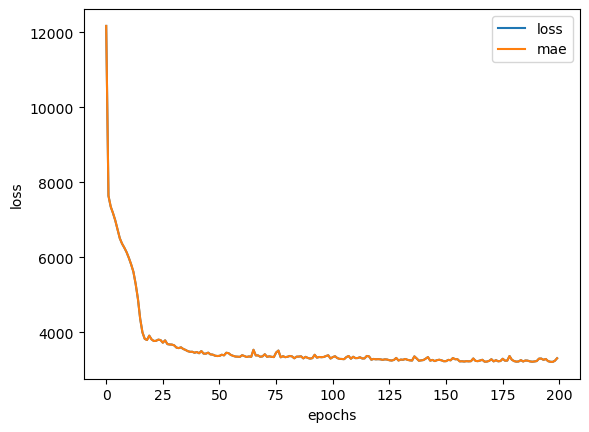

In [24]:
# plot history (also known as loss curve or training curve)
pd.DataFrame(histroy.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> For how long should someone experiment?-------- Well, it depends! TensorFlow has a solution called **EarlyStopping Callback**, which is a TensorFlow component you can add to the model to stop improving at certain metric.

## Preprocessing Data

- It is done for better metrics.
- Normalization and Standardization
- **N.B:** Neural Networks tend to prefer Normalization.

In [25]:
insurance = pd.read_csv("../../data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [27]:
# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

# create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [29]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [30]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [39]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
histroy = model_4.fit(X_train_normal, 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13311.0010 - mae: 13311.0010
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12544.3271 - mae: 12544.3271
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 9529.3145 - mae: 9529.3145
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7828.6006 - mae: 7828.6006
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7501.3291 - mae: 7501.3291
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7139.6060 - mae: 7139.6060
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6650.5801 - mae: 6650.5801
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 5984.9580 - mae: 5984.9580
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 5087.5229 - mae: 5087.5229
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4188.7783 - mae: 4188.

34/34 [==============================] - 0s 3ms/step - loss: 3490.0254 - mae: 3490.0254
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.2371 - mae: 3488.2371
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.5901 - mae: 3488.5901
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 3482.5793 - mae: 3482.5793
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 3480.8298 - mae: 3480.8298
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.3118 - mae: 3488.3118
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3487.1284 - mae: 3487.1284
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 3485.7202 - mae: 3485.7202
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 3487.8967 - mae: 3487.8967
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 3485.6936 - mae: 3485.6936
Epo

In [40]:
# Evaluate the insurance model tried on normalized data

model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3170.1394 - mae: 3170.1394


[3170.139404296875, 3170.139404296875]